In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
p = sns.color_palette()

USE_SAMPLE = False
TRAIN_FACE = '../sample/train_face.txt' if USE_SAMPLE else '../data/train_face.txt'
TRAIN_USER_INTERACT = '../sample/train_interaction.txt' if USE_SAMPLE else '../data/train_interaction.txt'
TRAIN_TEXT = '../sample/train_text.txt' if USE_SAMPLE else '../data/train_text.txt'
TEST_FACE = '../sample/test_face.txt' if USE_SAMPLE else '../data/test_face.txt'
TEST_INTERACT = '../sample/test_interaction.txt' if USE_SAMPLE else '../data/test_interaction.txt'
TEST_TEXT = '../sample/test_text.txt' if USE_SAMPLE else '../data/test_text.txt'

In [2]:
face_train = pd.read_csv(TRAIN_FACE, 
                        sep='\t', 
                        header=None, 
                        names=['photo_id', 'faces'])

In [3]:
user_item_train = pd.read_csv(TRAIN_USER_INTERACT, 
                             sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'click', 'like', 'follow', 'time', 'playing_time', 'duration_time'])

In [111]:
text_train = pd.read_csv(TRAIN_TEXT,
                       sep='\t',
                       header=None,
                       names=['photo_id', 'cover_words'])

In [4]:
face_test = pd.read_csv(TEST_FACE, 
                        sep='\t', 
                        header=None, 
                        names=['photo_id', 'faces'])

In [5]:
user_item_test = pd.read_csv(TEST_INTERACT, 
                             sep='\t', 
                             header=None, 
                             names=['user_id', 'photo_id', 'time', 'duration_time'])

In [114]:
text_test = pd.read_csv(TEST_TEXT,
                       sep='\t',
                       header=None,
                       names=['photo_id', 'cover_words'])

In [6]:
user_item_train['click'].mean()

0.2024292396826292

In [7]:
user_item_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20854344 entries, 0 to 20854343
Data columns (total 8 columns):
user_id          int64
photo_id         int64
click            int64
like             int64
follow           int64
time             int64
playing_time     int64
duration_time    int64
dtypes: int64(8)
memory usage: 1.2 GB


In [8]:
user_item_train['duration_time'].describe()

count    2.085434e+07
mean     1.989893e+01
std      2.735497e+01
min      0.000000e+00
25%      1.100000e+01
50%      1.100000e+01
75%      1.700000e+01
max      3.831000e+03
Name: duration_time, dtype: float64

In [9]:
user_item_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291332 entries, 0 to 3291331
Data columns (total 4 columns):
user_id          int64
photo_id         int64
time             int64
duration_time    int64
dtypes: int64(4)
memory usage: 100.4 MB


In [10]:
user_item_train['like'].mean()

0.003035866292413705

In [11]:
user_item_train['follow'].mean()

0.0009912563061202021

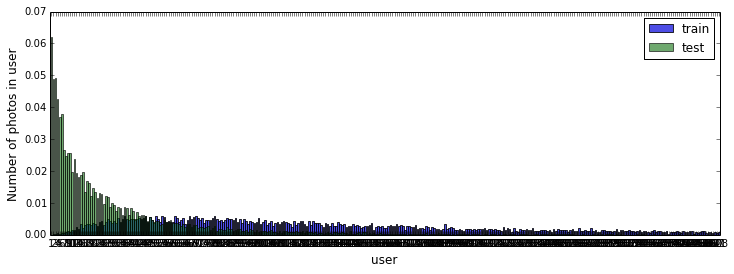

In [201]:
sizes_train = user_item_train.groupby('user_id')['photo_id'].count().value_counts()
sizes_test = user_item_test.groupby('user_id')['photo_id'].count().value_counts()
sizes_train = sizes_train / np.sum(sizes_train)
sizes_test = sizes_test / np.sum(sizes_test)

plt.figure(figsize=(12,4))
sns.barplot(sizes_train.index, sizes_train.values, alpha=0.8, color=p[0], label='train')
sns.barplot(sizes_test.index, sizes_test.values, alpha=0.6, color=p[1], label='test')
plt.legend()
plt.xlabel('user', fontsize=12)
plt.ylabel('Number of photos in user', fontsize=12)

In [12]:
photo_intersection_prop = 1. * len(set(user_item_train.photo_id.unique()) & set(user_item_test.photo_id.unique())) / len(user_item_test.photo_id.unique())

In [13]:
photo_intersection_prop

0.0

In [14]:
face_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613135 entries, 0 to 1613134
Data columns (total 2 columns):
photo_id    1613135 non-null int64
faces       1613135 non-null object
dtypes: int64(1), object(1)
memory usage: 24.6+ MB


In [15]:
def add_face_feature(face_data):
    def ages_avg(lists):
        ages = [l[2] for l in lists if l[1] == 1]
        return reduce(ages, lambda x, y: x + y) / len(ages)
    face_data['faces'] = face_data['faces'].apply(eval)
    face_data['face_num'] = face_data['faces'].apply(lambda l : len(l))
    face_data['man_num'] = face_data['faces'].apply(lambda lists: len([1 for l in lists if l[1] == 1]))
    face_data['woman_num'] = face_data['faces'].apply(lambda lists: len([1 for l in lists if l[1] == 0]))
    face_data['man_scale'] = face_data['faces'].apply(lambda lists: sum([l[0] for l in lists if l[1] == 1]))
    face_data['woman_scale'] = face_data['faces'].apply(lambda lists: sum([l[0] for l in lists if l[1] == 0]))
    face_data['human_scale'] = face_data['man_scale'] + face_data['woman_scale']
    face_data['man_avg_age'] = face_data['faces'].apply(lambda lists: np.mean([l[2] for l in lists if l[1] == 1]))
    face_data['woman_avg_age'] = face_data['faces'].apply(lambda lists: np.mean([l[2] for l in lists if l[1] == 0]))
    face_data['human_avg_age'] = face_data['faces'].apply(lambda lists: np.mean([l[2] for l in lists]))
    face_data['man_avg_attr'] = face_data['faces'].apply(lambda lists: np.mean([l[3] for l in lists if l[1] == 1]))
    face_data['woman_avg_attr'] = face_data['faces'].apply(lambda lists: np.mean([l[3] for l in lists if l[1] == 0]))
    face_data['human_avg_attr'] = face_data['faces'].apply(lambda lists: np.mean([l[3] for l in lists]))
    return face_data

In [16]:
face_data = pd.concat([face_train, face_test])

In [17]:
face_tata = add_face_feature(face_data)

/Library/Python/2.7/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [18]:
face_data.fillna(0, inplace=True)

In [19]:
face_data.head()

,photo_id,faces,face_num,man_num,woman_num,man_scale,woman_scale,human_scale,man_avg_age,woman_avg_age,human_avg_age,man_avg_attr,woman_avg_attr,human_avg_attr
0,9,"[[0.0377, 1, 3, 50]]",1,1,0,0.0377,0.0000,0.0377,3.0,0.0,3.0,50.0,0.0,50.0
1,3,"[[0.219, 0, 22, 66]]",1,0,1,0.0000,0.2190,0.2190,0.0,22.0,22.0,0.0,66.0,66.0
2,8,"[[0.0849, 0, 13, 54], [0.1221, 0, 22, 88]]",2,0,2,0.0000,0.2070,0.2070,0.0,17.5,17.5,0.0,71.0,71.0
3,2,"[[0.2018, 1, 18, 60]]",1,1,0,0.2018,0.0000,0.2018,18.0,0.0,18.0,60.0,0.0,60.0
4,19,"[[0.0123, 0, 24, 52]]",1,0,1,0.0000,0.0123,0.0123,0.0,24.0,24.0,0.0,52.0,52.0


In [20]:
face_data.drop(['faces'], axis=1, inplace=True)

In [21]:
face_data.head()

,photo_id,face_num,man_num,woman_num,man_scale,woman_scale,human_scale,man_avg_age,woman_avg_age,human_avg_age,man_avg_attr,woman_avg_attr,human_avg_attr
0,9,1,1,0,0.0377,0.0000,0.0377,3.0,0.0,3.0,50.0,0.0,50.0
1,3,1,0,1,0.0000,0.2190,0.2190,0.0,22.0,22.0,0.0,66.0,66.0
2,8,2,0,2,0.0000,0.2070,0.2070,0.0,17.5,17.5,0.0,71.0,71.0
3,2,1,1,0,0.2018,0.0000,0.2018,18.0,0.0,18.0,60.0,0.0,60.0
4,19,1,0,1,0.0000,0.0123,0.0123,0.0,24.0,24.0,0.0,52.0,52.0


In [22]:
np.sum(face_data['face_num']>=2)

311640

In [23]:
face_data.head()

,photo_id,face_num,man_num,woman_num,man_scale,woman_scale,human_scale,man_avg_age,woman_avg_age,human_avg_age,man_avg_attr,woman_avg_attr,human_avg_attr
0,9,1,1,0,0.0377,0.0000,0.0377,3.0,0.0,3.0,50.0,0.0,50.0
1,3,1,0,1,0.0000,0.2190,0.2190,0.0,22.0,22.0,0.0,66.0,66.0
2,8,2,0,2,0.0000,0.2070,0.2070,0.0,17.5,17.5,0.0,71.0,71.0
3,2,1,1,0,0.2018,0.0000,0.2018,18.0,0.0,18.0,60.0,0.0,60.0
4,19,1,0,1,0.0000,0.0123,0.0123,0.0,24.0,24.0,0.0,52.0,52.0


In [24]:
user_item_data = pd.concat([user_item_train[['user_id', 'photo_id', 'time', 'duration_time']], user_item_test])

photo_data = pd.DataFrame()
photo_data['photo_id'] = user_item_data['photo_id']
photo_data['exposure_num'] = user_item_data['photo_id'].groupby(user_item_data['photo_id']).transform('count') 
photo_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24145676 entries, 0 to 3291331
Data columns (total 2 columns):
photo_id        int64
exposure_num    int64
dtypes: int64(2)
memory usage: 552.7 MB


In [25]:
photo_data.drop_duplicates(inplace=True)
photo_data = pd.merge(photo_data, face_data,
                 how="left",
                 on=['photo_id'])



In [26]:
photo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5174532 entries, 0 to 5174531
Data columns (total 14 columns):
photo_id          int64
exposure_num      int64
face_num          float64
man_num           float64
woman_num         float64
man_scale         float64
woman_scale       float64
human_scale       float64
man_avg_age       float64
woman_avg_age     float64
human_avg_age     float64
man_avg_attr      float64
woman_avg_attr    float64
human_avg_attr    float64
dtypes: float64(12), int64(2)
memory usage: 592.2 MB


In [27]:
photo_data.fillna(0, inplace=True)


In [28]:
photo_data.head(10)

,photo_id,exposure_num,face_num,man_num,woman_num,man_scale,woman_scale,human_scale,man_avg_age,woman_avg_age,human_avg_age,man_avg_attr,woman_avg_attr,human_avg_attr
0,6484142,13,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,4647664,2,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,4994626,34,3.0,3.0,0.0,0.3959,0.0000,0.3959,26.333333,0.0,26.333333,48.333333,0.0,48.333333
3,4416881,1,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,2597756,2,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
5,4977481,155,3.0,3.0,0.0,0.0103,0.0000,0.0103,27.000000,0.0,27.000000,51.666667,0.0,51.666667
6,5089000,852,1.0,0.0,1.0,0.0000,0.0384,0.0384,0.000000,22.0,22.000000,0.000000,84.0,84.000000
7,693195,55,2.0,1.0,1.0,0.0162,0.0094,0.0256,27.000000,27.0,27.000000,50.000000,51.0,50.500000
8,163901,265,2.0,1.0,1.0,0.0088,0.0104,0.0192,21.000000,27.0,24.000000,56.000000,48.0,52.000000
9,6472236,1,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


In [29]:
photo_data[photo_data['photo_id'] == 4647664]

,photo_id,exposure_num,face_num,man_num,woman_num,man_scale,woman_scale,human_scale,man_avg_age,woman_avg_age,human_avg_age,man_avg_attr,woman_avg_attr,human_avg_attr
1,4647664,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
np.sum(photo_data['face_num']>=1)

1942191

(0, 20)


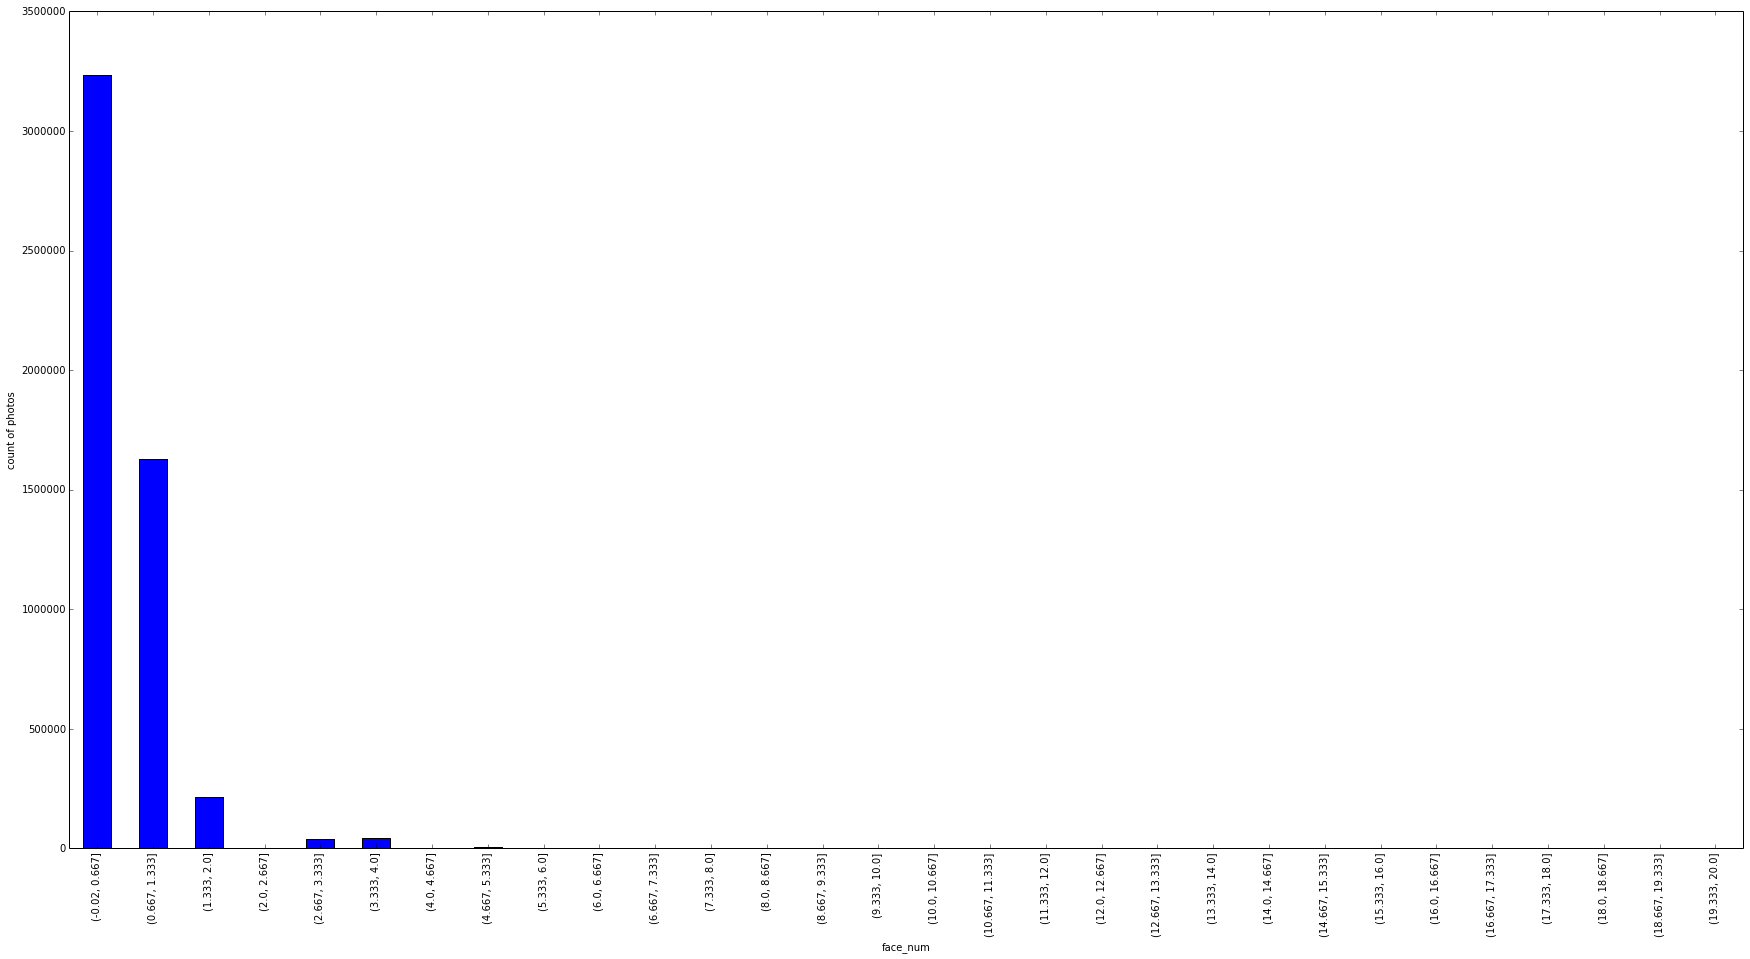

In [31]:
lower, higher = int(photo_data.face_num.min()), int(photo_data.face_num.max())
print(lower, higher)
n_bins = 20
# edges = range(lower, higher+1, (higher-lower)/n_bins)
# lbs = ['[%d, %d)'%(edges[i], edges[i+1]) for i in range(len(edges))]
# quartiles = pd.cut(photo_data.face_num, bins=n_bins, labels=lbs, include_lowest=True)
quartiles = pd.cut(photo_data.face_num, 30)
grouped = photo_data.groupby(quartiles)


plt.figure(figsize=(30,15)) 
plt.xlabel('face num')
plt.ylabel('count of photos')
photos_of_face_num = grouped.size()
photos_of_face_num.plot.bar()

In [32]:
def plot_data_cut(df, col, n_bins=20):
    quartiles = pd.cut(df[col], n_bins)
    grouped = df.groupby(quartiles)
    
    plt.figure(figsize=(30,15)) 
    plt.xlabel(col)
    plt.ylabel('counts in ' + col)
    nums_of_col = grouped.size()
    nums_of_col.plot.bar()

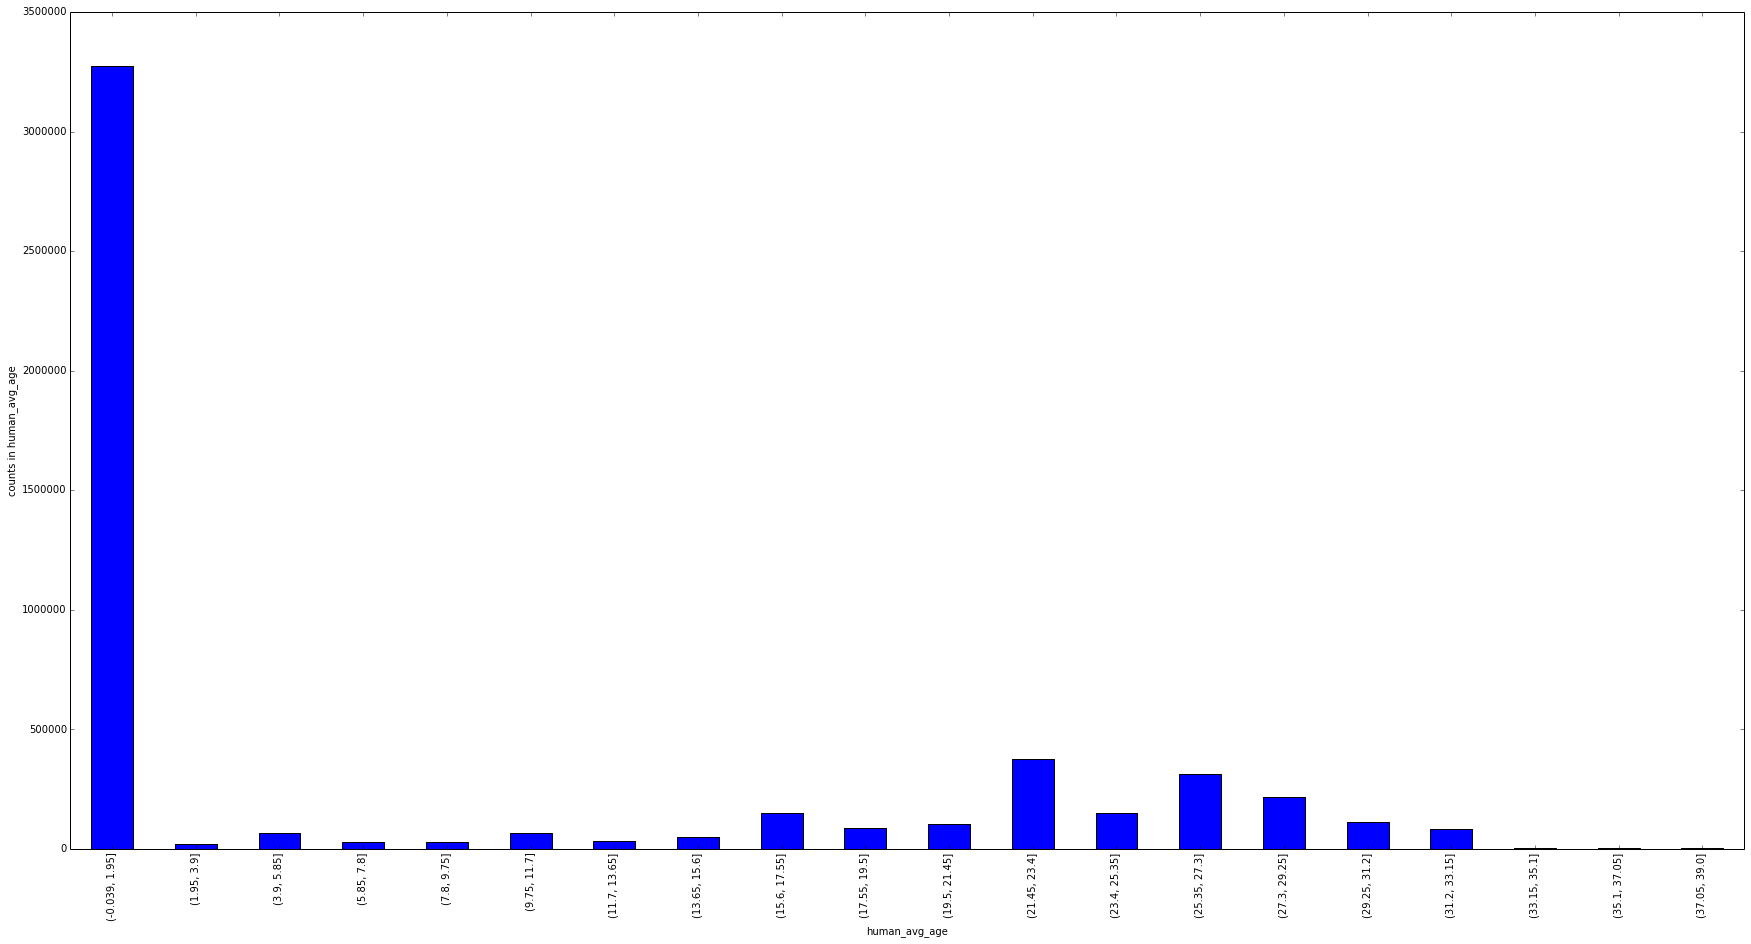

In [33]:
plot_data_cut(photo_data, 'human_avg_age', 20)

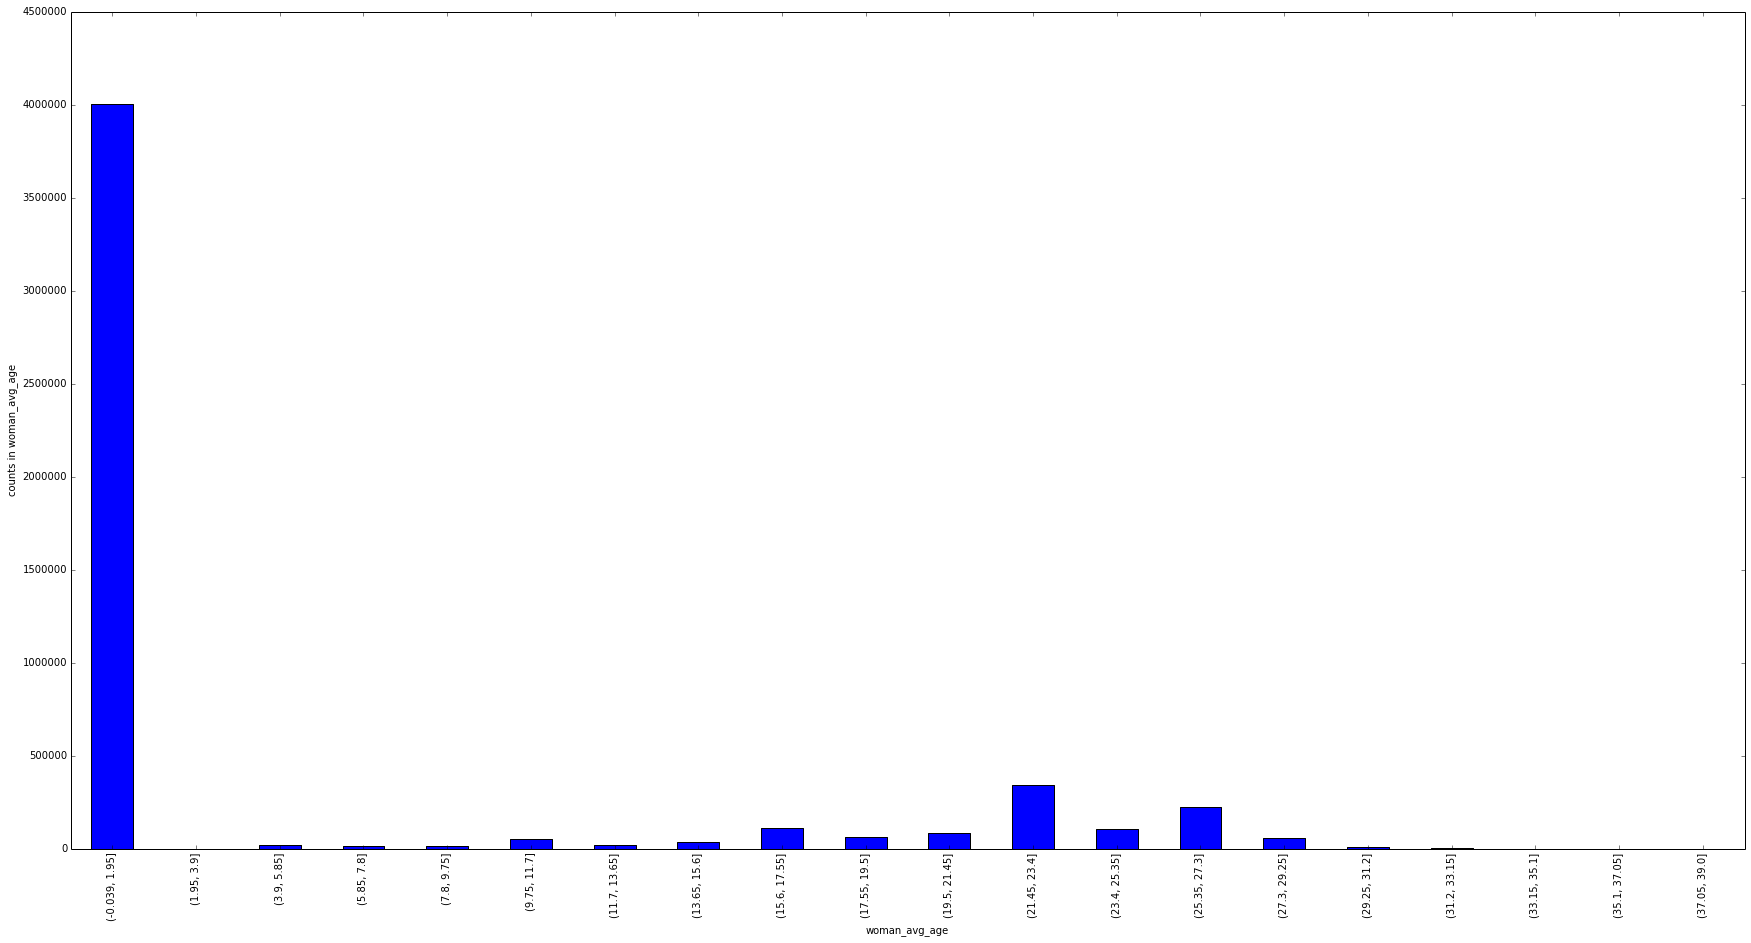

In [34]:
plot_data_cut(photo_data, 'woman_avg_age', 20)

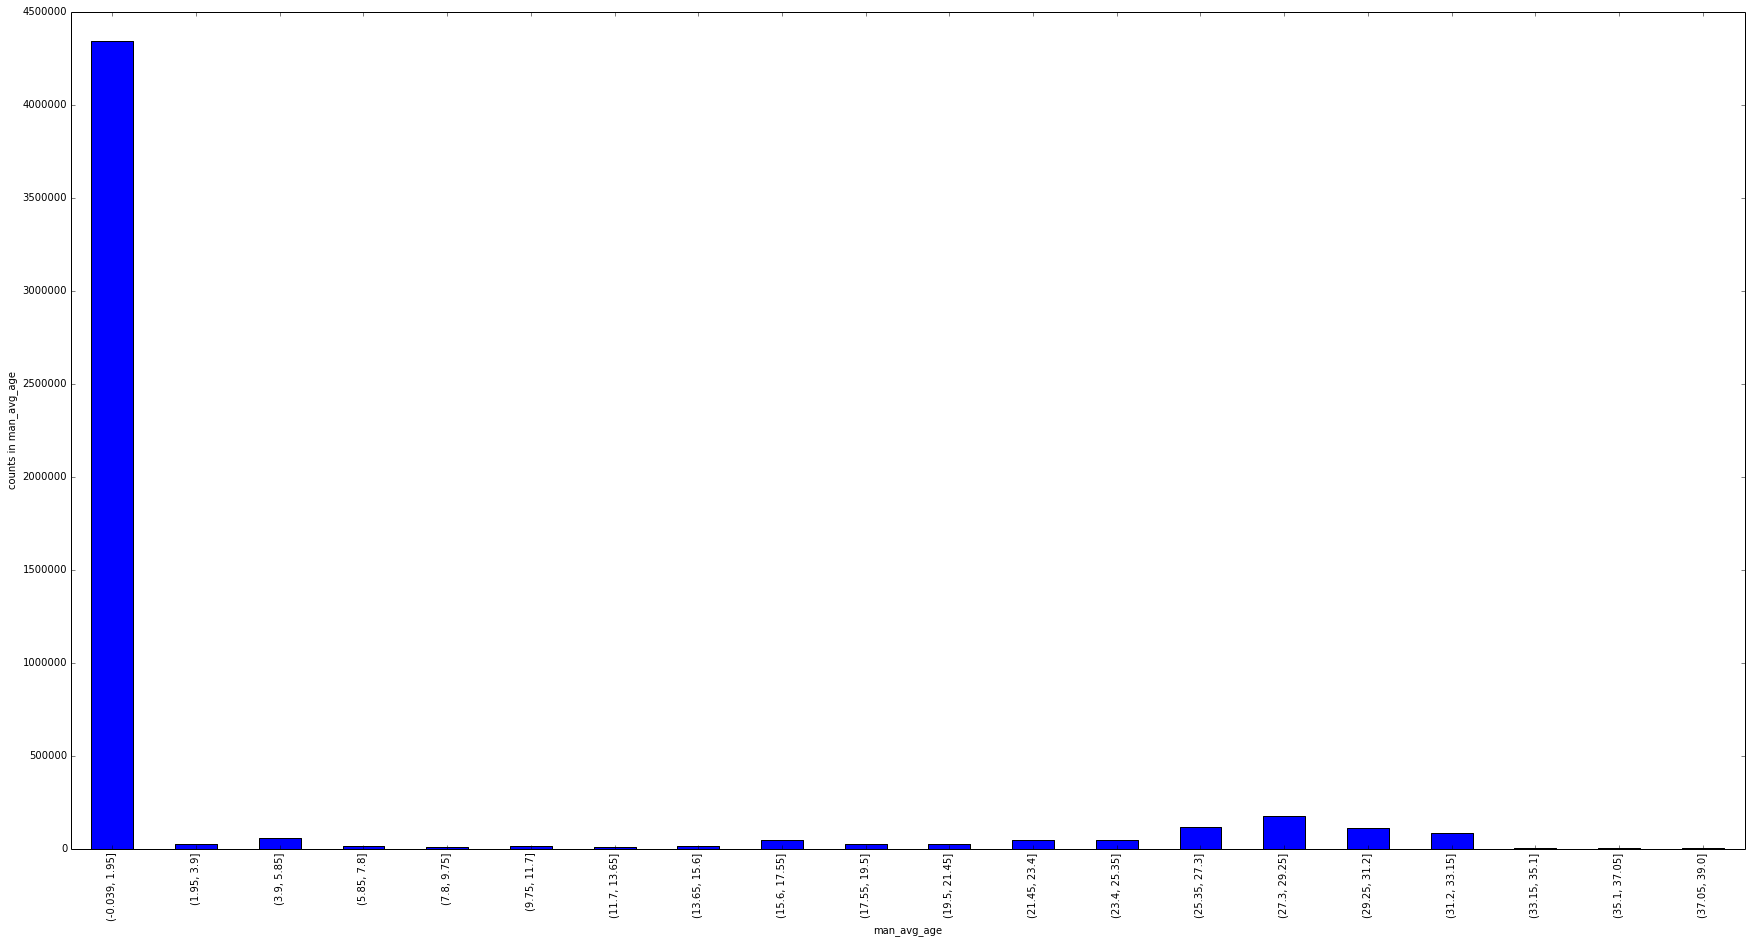

In [35]:
plot_data_cut(photo_data, 'man_avg_age', 20)

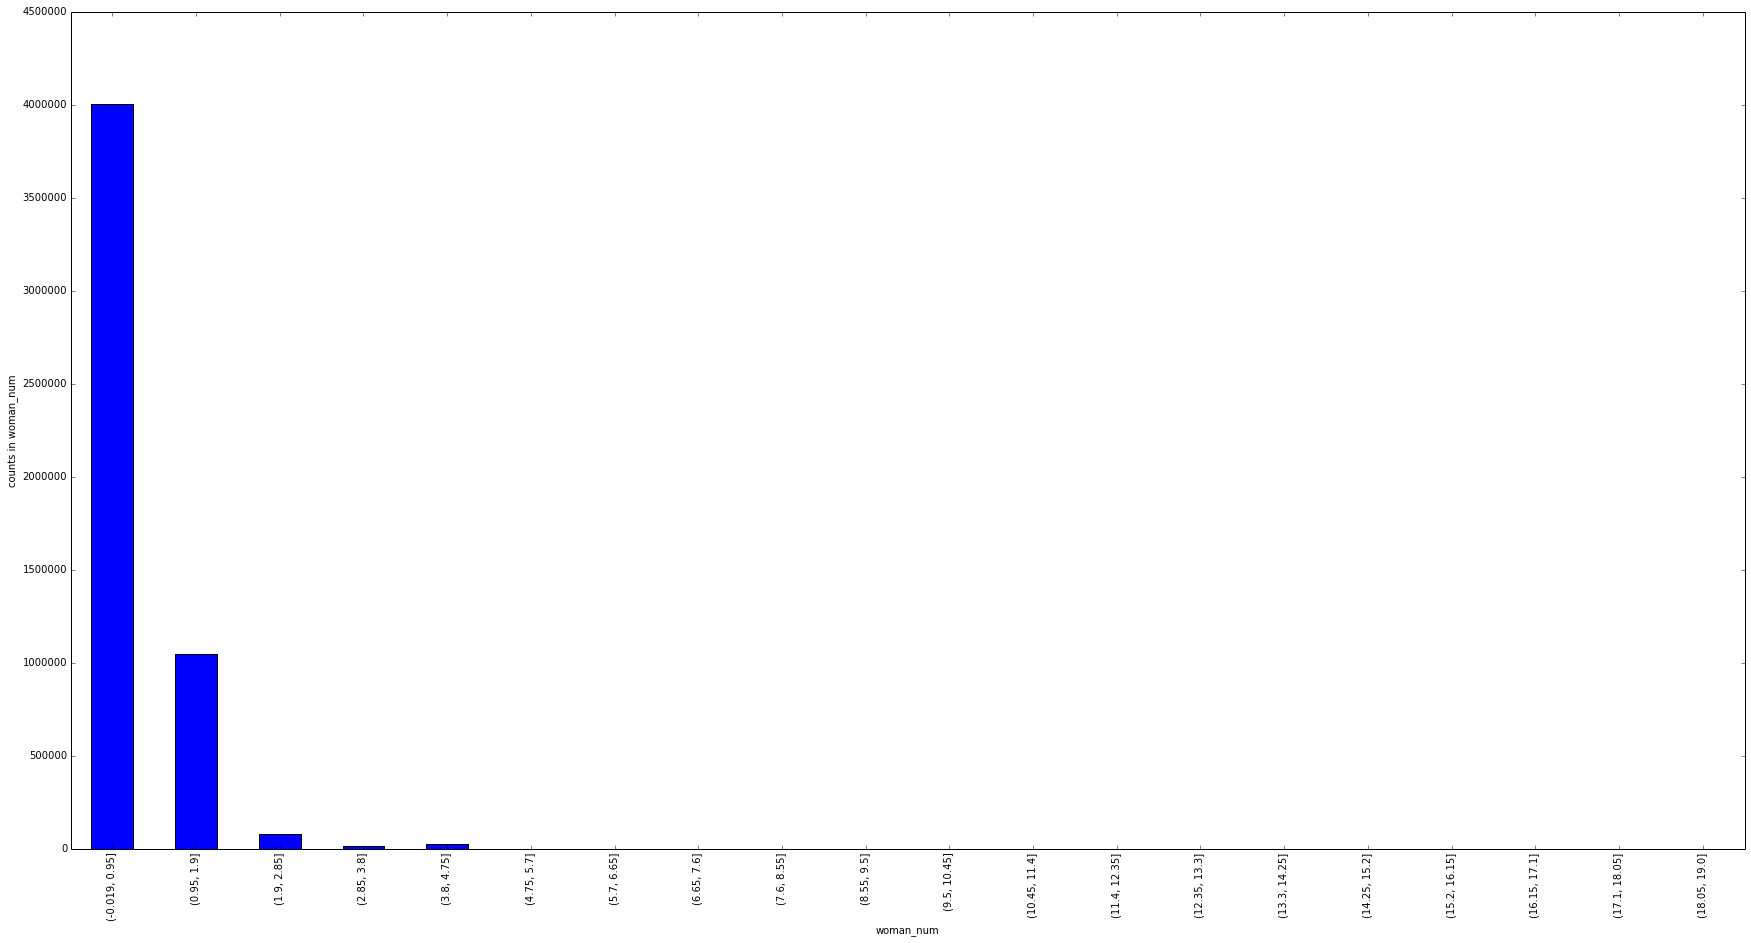

In [36]:
plot_data_cut(photo_data, 'woman_num', 20)

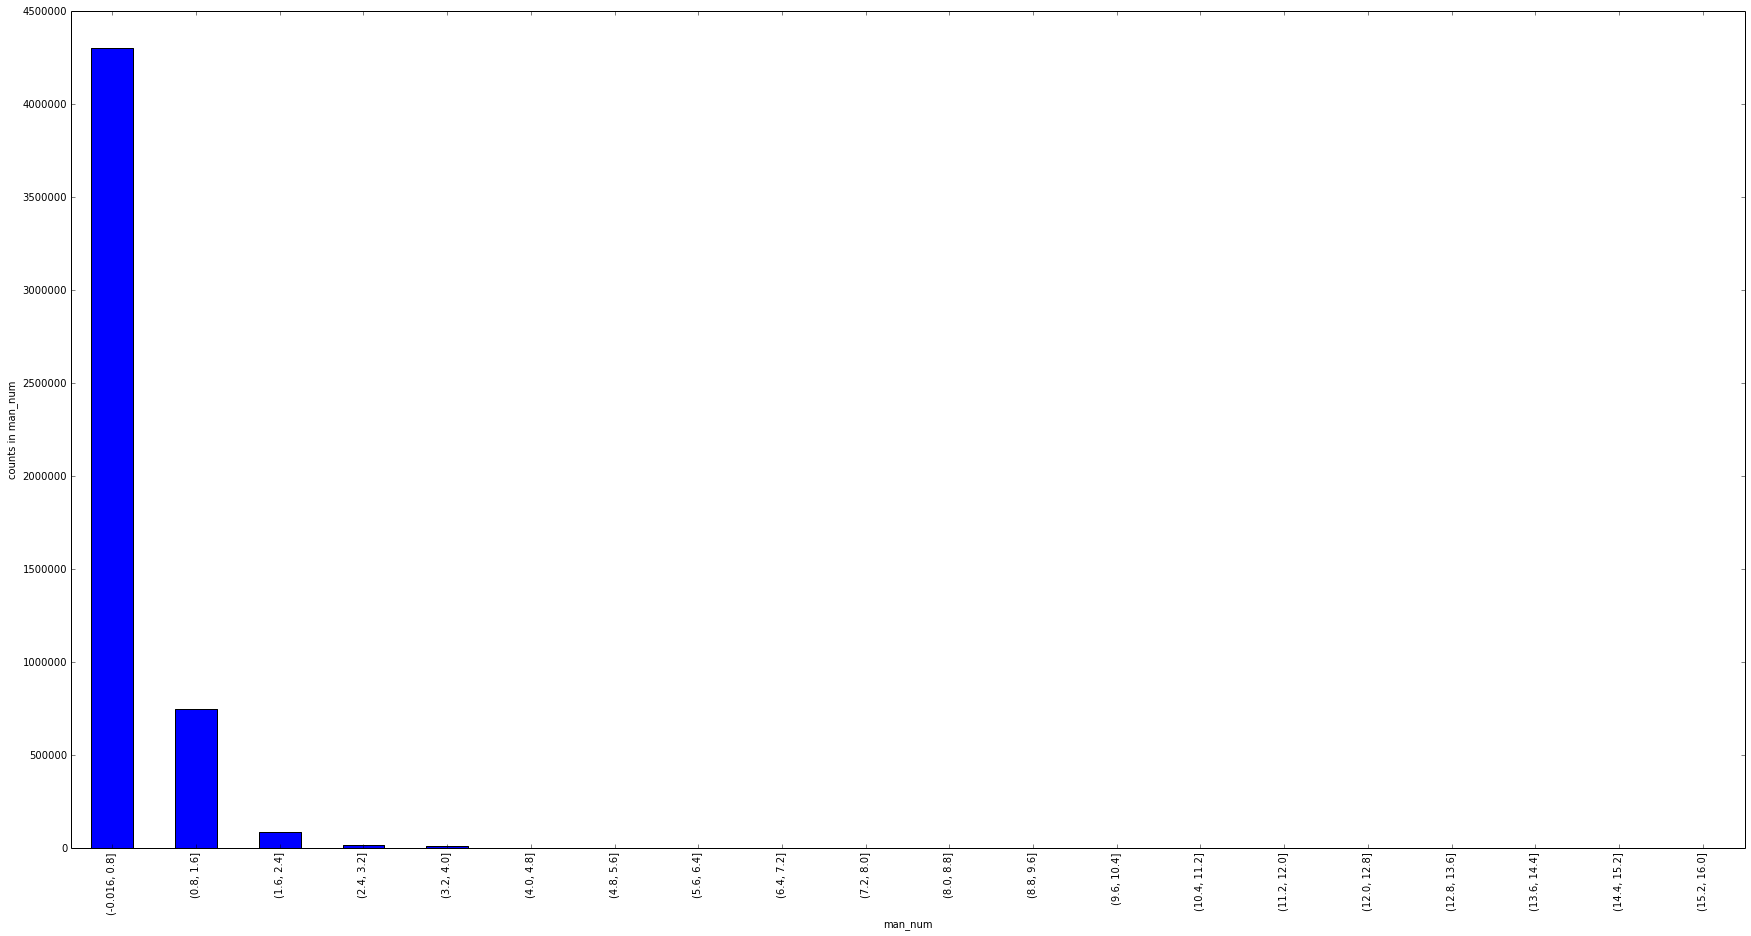

In [37]:
plot_data_cut(photo_data, 'man_num', 20)

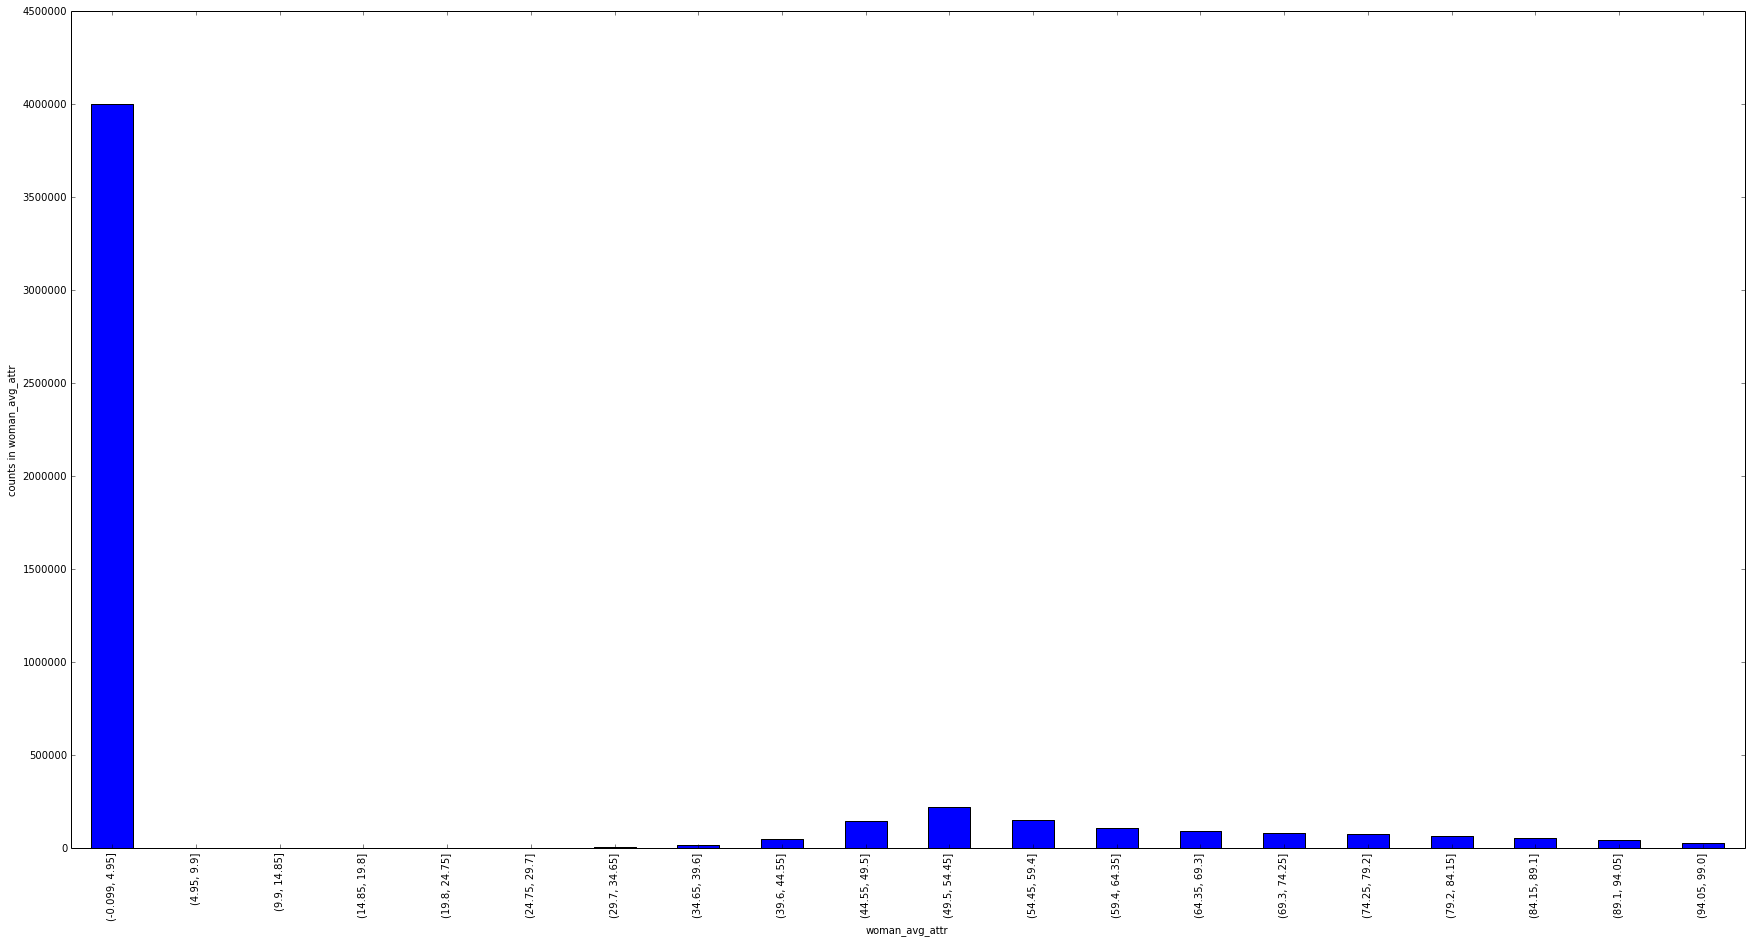

In [38]:
plot_data_cut(photo_data, 'woman_avg_attr', 20)

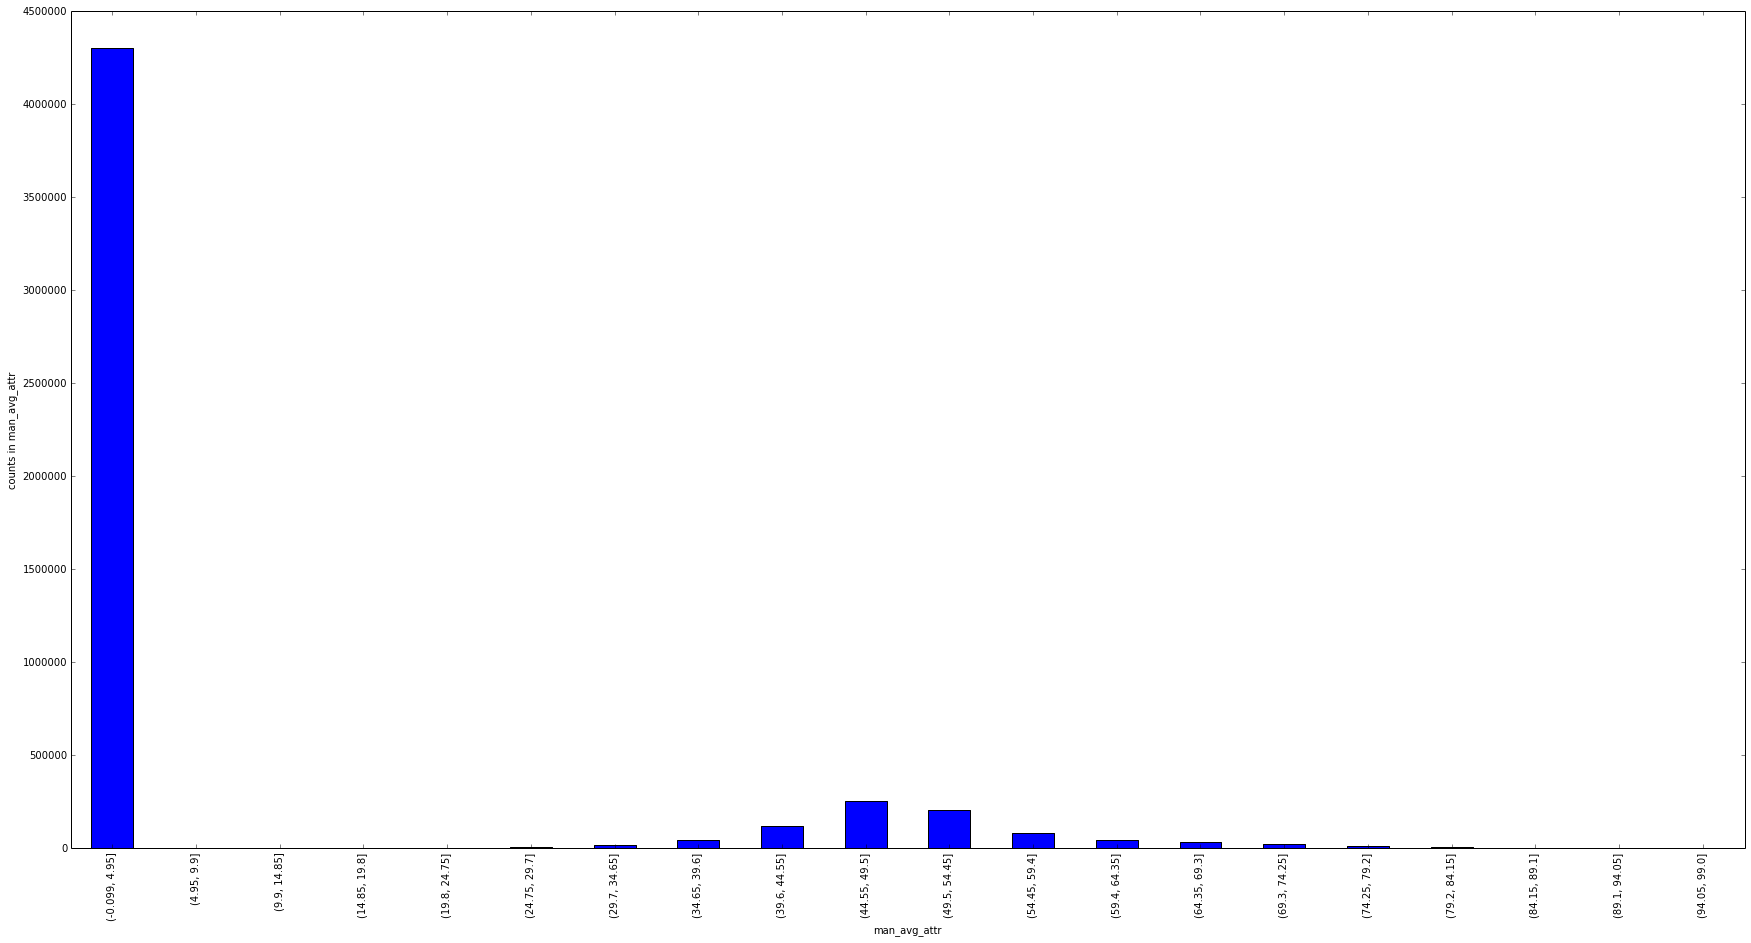

In [39]:
plot_data_cut(photo_data, 'man_avg_attr', 20)

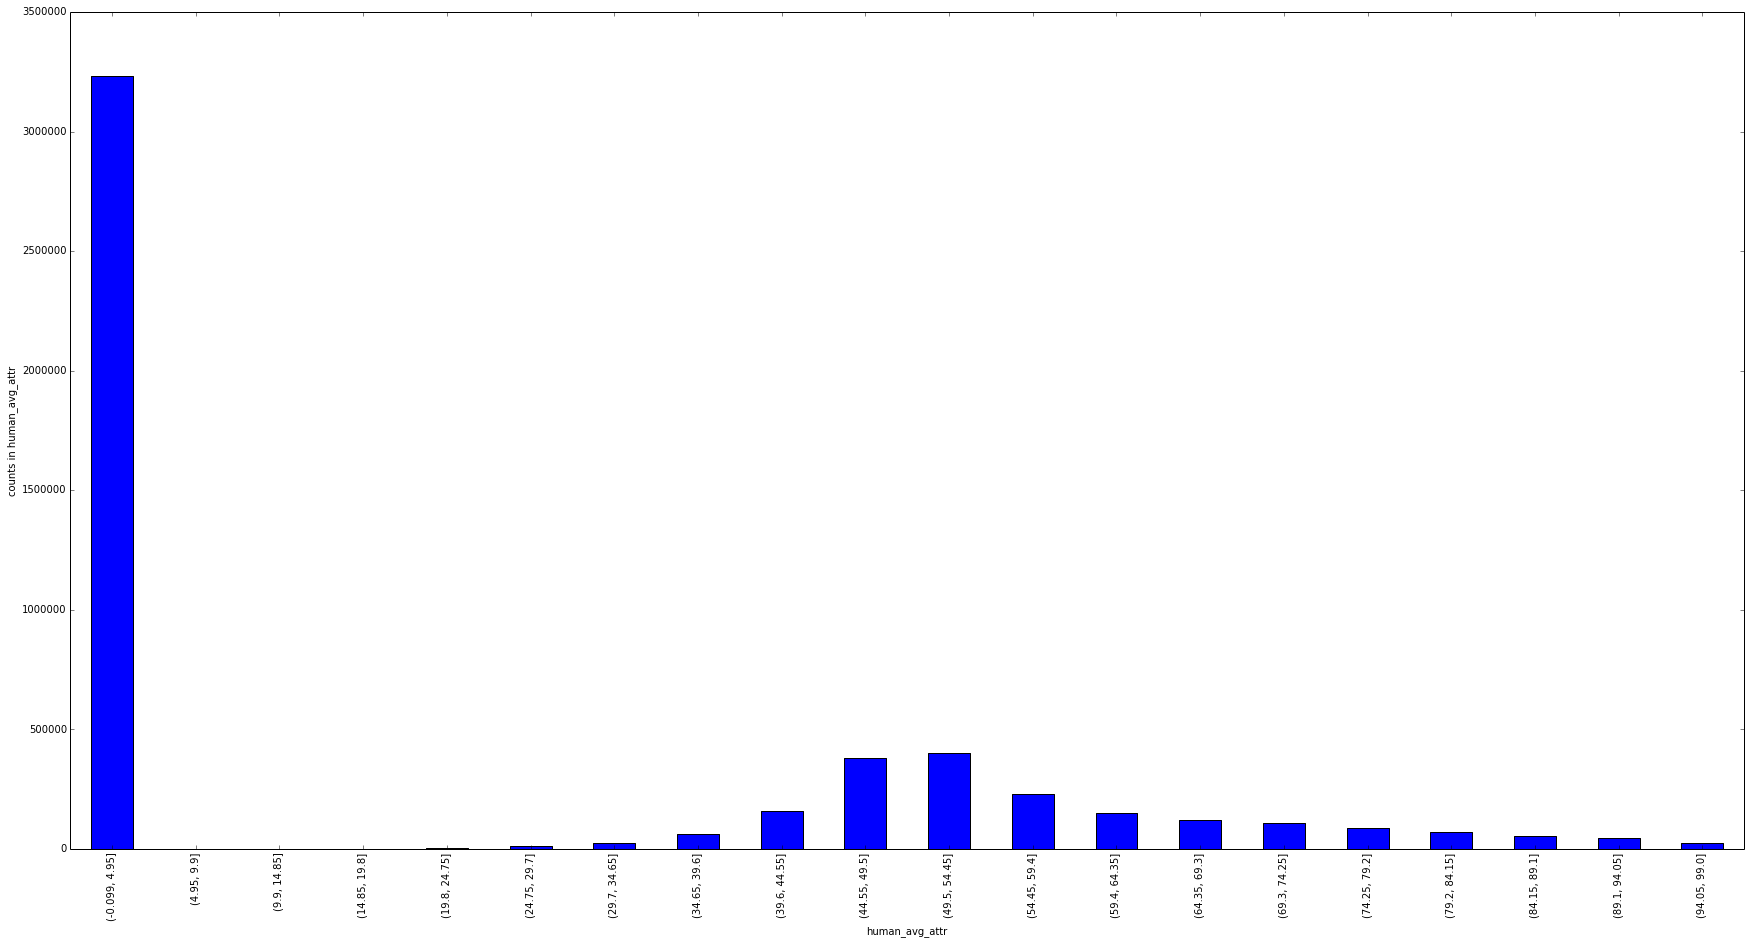

In [40]:
plot_data_cut(photo_data, 'human_avg_attr', 20)

In [41]:
def face_num_discretization(face_num):
    if face_num == 0:
        return "f0"
    elif face_num == 1:
        return "f1"
    elif face_num == 2:
        return "f2"
    elif face_num == 3:
        return "f3"
    else:
        return "ff"

photo_data['face_num_class'] = photo_data['face_num'].apply(face_num_discretization)

In [42]:
photo_data['have_face'] = photo_data['face_num'].apply(lambda x: x >= 1)

In [43]:
photo_data.head()

,photo_id,exposure_num,face_num,man_num,woman_num,man_scale,woman_scale,human_scale,man_avg_age,woman_avg_age,human_avg_age,man_avg_attr,woman_avg_attr,human_avg_attr,face_num_class,have_face
0,6484142,13,0.0,0.0,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,f0,False
1,4647664,2,0.0,0.0,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,f0,False
2,4994626,34,3.0,3.0,0.0,0.3959,0.0,0.3959,26.333333,0.0,26.333333,48.333333,0.0,48.333333,f3,True
3,4416881,1,0.0,0.0,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,f0,False
4,2597756,2,0.0,0.0,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,f0,False


In [44]:
# pd.get_dummies(photo_data)

In [45]:
user_item_train = pd.merge(user_item_train, photo_data,
                          how='left',
                          on=['photo_id'])

In [46]:
user_item_train.head()

,user_id,photo_id,click,like,follow,time,playing_time,duration_time,exposure_num,face_num,...,woman_scale,human_scale,man_avg_age,woman_avg_age,human_avg_age,man_avg_attr,woman_avg_attr,human_avg_attr,face_num_class,have_face
0,1637,6484142,0,0,0,761036604603,0,11,13,0.0,...,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,f0,False
1,1637,4647664,0,0,0,761035501863,0,11,2,0.0,...,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,f0,False
2,1637,4994626,1,0,0,761036933553,11,10,34,3.0,...,0.0,0.3959,26.333333,0.0,26.333333,48.333333,0.0,48.333333,f3,True
3,1637,4416881,0,0,0,761119247892,0,9,1,0.0,...,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,f0,False
4,1637,2597756,0,0,0,761119421332,0,11,2,0.0,...,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,f0,False


In [47]:
# user_item_train[(user_item_train['user_id'] == 35273) & (user_item_train['click'] == 1)]

In [48]:
# user_item_train['user_id'].groupby(user_item_train['user_id']).transform('count').drop_duplicates()

In [49]:
# user_item_train['like'].groupby(user_item_train['user_id']).transform('sum').drop_duplicates()

In [50]:
users = pd.DataFrame()
users['user_id'] = user_item_train['user_id']

users['browse_num'] = user_item_train['user_id'].groupby(user_item_train['user_id']).transform('count')
users['click_num'] = user_item_train['click'].groupby(user_item_train['user_id']).transform('sum')
users['like_num'] = user_item_train['like'].groupby(user_item_train['user_id']).transform('sum')
users['follow_num'] = user_item_train['follow'].groupby(user_item_train['user_id']).transform('sum')
users['playing_sum'] = user_item_train['playing_time'].groupby(user_item_train['user_id']).transform('sum')
users['duration_sum'] = user_item_train['duration_time'].groupby(user_item_train['user_id']).transform('sum')
users['click_ratio'] = user_item_train['click'].groupby(user_item_train['user_id']).transform('mean')
users['like_ratio'] = user_item_train['like'].groupby(user_item_train['user_id']).transform('mean')
users['follow_ratio'] = user_item_train['follow'].groupby(user_item_train['user_id']).transform('mean')
users['playing_ratio'] = (users['playing_sum'] / users['duration_sum'])

In [51]:
users.head()

,user_id,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,follow_ratio,playing_ratio
0,1637,1736,365,4,0,4124,27726,0.210253,0.002304,0.0,0.148741
1,1637,1736,365,4,0,4124,27726,0.210253,0.002304,0.0,0.148741
2,1637,1736,365,4,0,4124,27726,0.210253,0.002304,0.0,0.148741
3,1637,1736,365,4,0,4124,27726,0.210253,0.002304,0.0,0.148741
4,1637,1736,365,4,0,4124,27726,0.210253,0.002304,0.0,0.148741


In [52]:
users.drop_duplicates(inplace=True)

In [53]:
users.head()

,user_id,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,follow_ratio,playing_ratio
0,1637,1736,365,4,0,4124,27726,0.210253,0.002304,0.000000,0.148741
1736,17470,477,82,0,1,1937,8586,0.171908,0.000000,0.002096,0.225600
2213,14148,852,139,2,1,1120,16928,0.163146,0.002347,0.001174,0.066163
3065,37431,355,128,4,1,2548,8752,0.360563,0.011268,0.002817,0.291133
3420,35273,2486,576,0,1,7228,35415,0.231698,0.000000,0.000402,0.204094


In [54]:
users.reset_index(drop=True, inplace=True)

In [55]:
users.head()

,user_id,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,follow_ratio,playing_ratio
0,1637,1736,365,4,0,4124,27726,0.210253,0.002304,0.000000,0.148741
1,17470,477,82,0,1,1937,8586,0.171908,0.000000,0.002096,0.225600
2,14148,852,139,2,1,1120,16928,0.163146,0.002347,0.001174,0.066163
3,37431,355,128,4,1,2548,8752,0.360563,0.011268,0.002817,0.291133
4,35273,2486,576,0,1,7228,35415,0.231698,0.000000,0.000402,0.204094


In [56]:
# 用户点击视频中对人脸和颜值以及年龄的偏好，以后考虑离散化
users['face_favor'] = user_item_train.loc[user_item_train['click']==1, ['user_id', 'face_num']].groupby(user_item_train['user_id']).transform('mean').drop_duplicates(['user_id'])['face_num'].values
users['man_favor'] = user_item_train.loc[user_item_train['click']==1, ['user_id', 'man_num']].groupby(user_item_train['user_id']).transform('mean').drop_duplicates(['user_id'])['man_num'].values
users['woman_favor'] = user_item_train.loc[user_item_train['click']==1, ['user_id', 'woman_num']].groupby(user_item_train['user_id']).transform('mean').drop_duplicates(['user_id'])['woman_num'].values
users['man_cv_favor'] = user_item_train.loc[user_item_train['click']==1, ['user_id', 'man_scale']].groupby(user_item_train['user_id']).transform('mean').drop_duplicates(['user_id'])['man_scale'].values
users['woman_cv_favor'] = user_item_train.loc[user_item_train['click']==1, ['user_id', 'woman_scale']].groupby(user_item_train['user_id']).transform('mean').drop_duplicates(['user_id'])['woman_scale'].values
users['man_age_favor'] = user_item_train.loc[user_item_train['click']==1, ['user_id', 'man_avg_age']].groupby(user_item_train['user_id']).transform('mean').drop_duplicates(['user_id'])['man_avg_age'].values
users['woman_age_favor'] = user_item_train.loc[user_item_train['click']==1, ['user_id', 'woman_avg_age']].groupby(user_item_train['user_id']).transform('mean').drop_duplicates(['user_id'])['woman_avg_age'].values
users['man_yen_value_favor'] = user_item_train.loc[user_item_train['click']==1, ['user_id', 'man_avg_attr']].groupby(user_item_train['user_id']).transform('mean').drop_duplicates(['user_id'])['man_avg_attr'].values
users['woman_yen_value_favor'] = user_item_train.loc[user_item_train['click']==1, ['user_id', 'woman_avg_attr']].groupby(user_item_train['user_id']).transform('mean').drop_duplicates(['user_id'])['woman_avg_attr'].values


In [57]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15140 entries, 0 to 15139
Data columns (total 20 columns):
user_id                  15140 non-null int64
browse_num               15140 non-null int64
click_num                15140 non-null int64
like_num                 15140 non-null int64
follow_num               15140 non-null int64
playing_sum              15140 non-null int64
duration_sum             15140 non-null int64
click_ratio              15140 non-null float64
like_ratio               15140 non-null float64
follow_ratio             15140 non-null float64
playing_ratio            15140 non-null float64
face_favor               15140 non-null float64
man_favor                15140 non-null float64
woman_favor              15140 non-null float64
man_cv_favor             15140 non-null float64
woman_cv_favor           15140 non-null float64
man_age_favor            15140 non-null float64
woman_age_favor          15140 non-null float64
man_yen_value_favor      15140 non-null f

In [58]:
users.head()

,user_id,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,follow_ratio,playing_ratio,face_favor,man_favor,woman_favor,man_cv_favor,woman_cv_favor,man_age_favor,woman_age_favor,man_yen_value_favor,woman_yen_value_favor
0,1637,1736,365,4,0,4124,27726,0.210253,0.002304,0.000000,0.148741,0.997260,0.391781,0.605479,0.014004,0.028724,7.516667,11.586758,15.523516,27.644749
1,17470,477,82,0,1,1937,8586,0.171908,0.000000,0.002096,0.225600,0.426829,0.268293,0.158537,0.006262,0.014798,5.912602,3.987805,10.439024,10.829268
2,14148,852,139,2,1,1120,16928,0.163146,0.002347,0.001174,0.066163,0.726619,0.201439,0.525180,0.008571,0.051771,4.125899,10.139688,7.700000,25.859712
3,37431,355,128,4,1,2548,8752,0.360563,0.011268,0.002817,0.291133,0.484375,0.226562,0.257812,0.012066,0.018660,4.979167,5.050781,8.635417,14.738281
4,35273,2486,576,0,1,7228,35415,0.231698,0.000000,0.000402,0.204094,0.359375,0.194444,0.164931,0.007851,0.011083,4.123264,3.647569,7.314959,9.075087


In [59]:
import numpy as np
import scipy as sp
from scipy import sparse as ssp
from scipy.stats import spearmanr
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

In [60]:
user_item_train = pd.merge(user_item_train, users,
                          how='inner',
                          on=['user_id'])


In [61]:
user_item_train.head()

,user_id,photo_id,click,like,follow,time,playing_time,duration_time,exposure_num,face_num,...,playing_ratio,face_favor,man_favor,woman_favor,man_cv_favor,woman_cv_favor,man_age_favor,woman_age_favor,man_yen_value_favor,woman_yen_value_favor
0,1637,6484142,0,0,0,761036604603,0,11,13,0.0,...,0.148741,0.99726,0.391781,0.605479,0.014004,0.028724,7.516667,11.586758,15.523516,27.644749
1,1637,4647664,0,0,0,761035501863,0,11,2,0.0,...,0.148741,0.99726,0.391781,0.605479,0.014004,0.028724,7.516667,11.586758,15.523516,27.644749
2,1637,4994626,1,0,0,761036933553,11,10,34,3.0,...,0.148741,0.99726,0.391781,0.605479,0.014004,0.028724,7.516667,11.586758,15.523516,27.644749
3,1637,4416881,0,0,0,761119247892,0,9,1,0.0,...,0.148741,0.99726,0.391781,0.605479,0.014004,0.028724,7.516667,11.586758,15.523516,27.644749
4,1637,2597756,0,0,0,761119421332,0,11,2,0.0,...,0.148741,0.99726,0.391781,0.605479,0.014004,0.028724,7.516667,11.586758,15.523516,27.644749


In [62]:
user_item_train.fillna(0, inplace=True)

In [63]:
user_item_train.head()

,user_id,photo_id,click,like,follow,time,playing_time,duration_time,exposure_num,face_num,...,playing_ratio,face_favor,man_favor,woman_favor,man_cv_favor,woman_cv_favor,man_age_favor,woman_age_favor,man_yen_value_favor,woman_yen_value_favor
0,1637,6484142,0,0,0,761036604603,0,11,13,0.0,...,0.148741,0.99726,0.391781,0.605479,0.014004,0.028724,7.516667,11.586758,15.523516,27.644749
1,1637,4647664,0,0,0,761035501863,0,11,2,0.0,...,0.148741,0.99726,0.391781,0.605479,0.014004,0.028724,7.516667,11.586758,15.523516,27.644749
2,1637,4994626,1,0,0,761036933553,11,10,34,3.0,...,0.148741,0.99726,0.391781,0.605479,0.014004,0.028724,7.516667,11.586758,15.523516,27.644749
3,1637,4416881,0,0,0,761119247892,0,9,1,0.0,...,0.148741,0.99726,0.391781,0.605479,0.014004,0.028724,7.516667,11.586758,15.523516,27.644749
4,1637,2597756,0,0,0,761119421332,0,11,2,0.0,...,0.148741,0.99726,0.391781,0.605479,0.014004,0.028724,7.516667,11.586758,15.523516,27.644749


In [64]:
user_item_train.columns

Index([u'user_id', u'photo_id', u'click', u'like', u'follow', u'time',
       u'playing_time', u'duration_time', u'exposure_num', u'face_num',
       u'man_num', u'woman_num', u'man_scale', u'woman_scale', u'human_scale',
       u'man_avg_age', u'woman_avg_age', u'human_avg_age', u'man_avg_attr',
       u'woman_avg_attr', u'human_avg_attr', u'face_num_class', u'have_face',
       u'browse_num', u'click_num', u'like_num', u'follow_num', u'playing_sum',
       u'duration_sum', u'click_ratio', u'like_ratio', u'follow_ratio',
       u'playing_ratio', u'face_favor', u'man_favor', u'woman_favor',
       u'man_cv_favor', u'woman_cv_favor', u'man_age_favor',
       u'woman_age_favor', u'man_yen_value_favor', u'woman_yen_value_favor'],
      dtype='object')

In [65]:
#?? 非常奇葩。。。无法直接要用xx['face_num'] 这个Series 作为一列给DataFrame当一列，赋值之是错误的值，并不是xx['face_num']
# users['face_favor'] = xx['face_num'].values

In [66]:
import gc
gc.collect()


7686

In [67]:
user_item_test.head()

,user_id,photo_id,time,duration_time
0,29999,8154819,761158905921,17
1,29999,8374672,761163438550,9
2,29999,7987126,761143659968,11
3,29999,7912672,761159000400,17
4,29999,9062638,761163738888,11


In [68]:
user_item_test = pd.merge(user_item_test, users,
                          how='inner',
                          on=['user_id'])

user_item_test = pd.merge(user_item_test, photo_data,
                         how='left',
                         on=['photo_id'])

In [69]:
user_item_test.head()

,user_id,photo_id,time,duration_time,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,...,woman_scale,human_scale,man_avg_age,woman_avg_age,human_avg_age,man_avg_attr,woman_avg_attr,human_avg_attr,face_num_class,have_face
0,29999,8154819,761158905921,17,267,90,1,3,943,4845,...,0.0077,0.0190,31.0,27.0,29.0,45.0,48.0,46.5,f2,True
1,29999,8374672,761163438550,9,267,90,1,3,943,4845,...,0.0000,0.0207,28.0,0.0,28.0,40.0,0.0,40.0,f1,True
2,29999,7987126,761143659968,11,267,90,1,3,943,4845,...,0.1103,0.1103,0.0,27.0,27.0,0.0,53.0,53.0,f1,True
3,29999,7912672,761159000400,17,267,90,1,3,943,4845,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,f0,False
4,29999,9062638,761163738888,11,267,90,1,3,943,4845,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,f0,False


In [70]:
set(list(user_item_train.columns.values)) - set(list(user_item_test.columns.values))

{'click', 'follow', 'like', 'playing_time'}

In [71]:
inter = set(list(user_item_train.columns.values)) & set(list(user_item_test.columns.values))

In [72]:
user_action_features = ['browse_num', 'click_num', 'like_num', 'follow_num', 'playing_sum','duration_sum', 'click_ratio', 'like_ratio', 'follow_ratio', 'playing_ratio']
    
face_features = ['face_num', 'man_num', 'woman_num', 'man_scale', 'woman_scale', 'human_scale', 'man_avg_age', 'woman_avg_age', 'human_avg_age',  'man_avg_attr', 'woman_avg_attr', 'human_avg_attr']
    
    
user_face_favor_features = ['face_favor', 'man_favor', 'woman_favor', 'man_cv_favor', 'woman_cv_favor', 'man_age_favor', 'woman_age_favor', 'man_yen_value_favor', 'woman_yen_value_favor']
    
    
id_features = ['user_id', 'photo_id']
time_features = ['time', 'duration_time']

photo_features = ['exposure_num', 'face_num_class', 'have_face'] + face_features
user_features = user_action_features + user_face_favor_features

y_label = ['click']

all_features = id_features + time_features + user_features + photo_features


In [73]:
len(inter)

38

In [74]:
len(all_features)

38

In [75]:
inter - set(all_features)

set()

In [76]:
def normalize_min_max(df, features):
    df[features] = df[features].apply(lambda x: (x-x.min())/(x.max()-x.min()))

def normalize_z_score(df, features):
    df[features] = df[features].apply(lambda x: (x-x.mean())/x.std())

In [77]:
num_train, num_test = user_item_train.shape[0], user_item_test.shape[0]

In [78]:
user_item_data = pd.concat([user_item_train[all_features], user_item_test[all_features]])

In [79]:
user_item_data.head()

,user_id,photo_id,time,duration_time,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,...,woman_num,man_scale,woman_scale,human_scale,man_avg_age,woman_avg_age,human_avg_age,man_avg_attr,woman_avg_attr,human_avg_attr
0,1637,6484142,761036604603,11,1736,365,4,0,4124,27726,...,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,1637,4647664,761035501863,11,1736,365,4,0,4124,27726,...,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,1637,4994626,761036933553,10,1736,365,4,0,4124,27726,...,0.0,0.3959,0.0,0.3959,26.333333,0.0,26.333333,48.333333,0.0,48.333333
3,1637,4416881,761119247892,9,1736,365,4,0,4124,27726,...,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,1637,2597756,761119421332,11,1736,365,4,0,4124,27726,...,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


In [ ]:
norm_features = ['time', 'duration_sum', 'exposure_num', 'click_num', 'playing_sum', 'woman_favor', 'woman_age_favor', 'woman_scale', 'woman_cv_favor', 'human_scale', 'browse_num', 'duration_sum']
normalize_min_max(user_item_data, norm_features)
# normalize_z_score(user_item_data, norm_features)

There is 17 strongly correlated values with click:
click              1.000000
click_ratio        0.311396
like               0.109534
exposure_num       0.084688
click_num          0.072373
follow             0.062525
like_ratio         0.055042
playing_ratio      0.047663
playing_sum        0.035336
follow_ratio       0.033242
woman_favor       -0.040384
woman_age_favor   -0.044631
woman_scale       -0.044989
woman_cv_favor    -0.049056
human_scale       -0.052977
browse_num        -0.135275
duration_sum      -0.137631
Name: click, dtype: float64


['click',
 'click_ratio',
 'like',
 'exposure_num',
 'click_num',
 'follow',
 'like_ratio',
 'playing_ratio',
 'playing_sum',
 'follow_ratio',
 'woman_favor',
 'woman_age_favor',
 'woman_scale',
 'woman_cv_favor',
 'human_scale',
 'browse_num',
 'duration_sum']

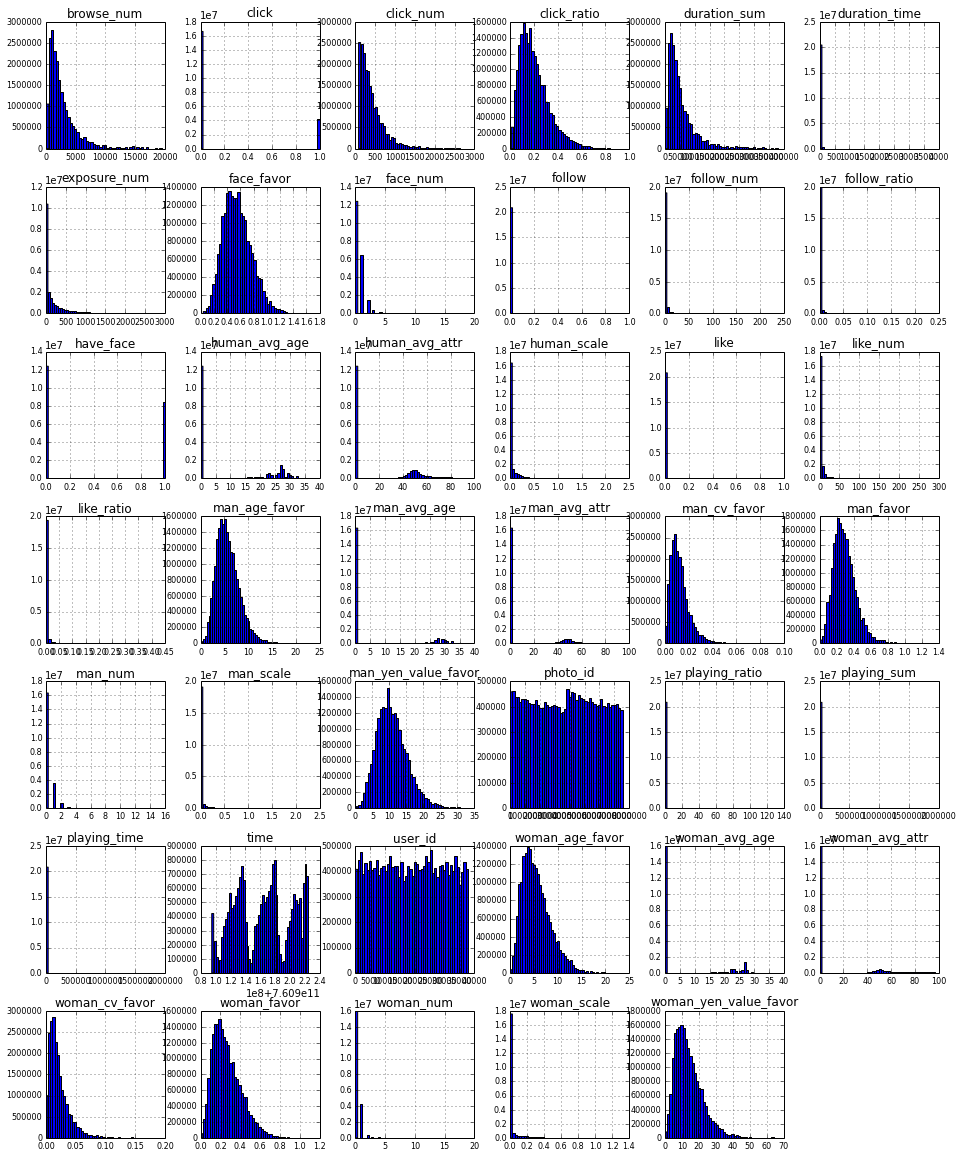

In [80]:
user_item_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

df_num_corr = user_item_train.corr()['click'][:-1] # -1 because the latest row is SalePrice


golden_features_list = df_num_corr[abs(df_num_corr) > 0.03].sort_values(ascending=False)
print("There is {} strongly correlated values with click:\n{}".format(len(golden_features_list), golden_features_list))

list(golden_features_list.index.values)

# 特征处理
## 类别特征和Onehot
onehot 和 embedding 特征对于训练神经网络特别有用, onehot 对于线性模型也是非常有用的，它相当于让线性模型变得非线性，通过逻辑组合特征，维度升高之后，能够实现非线性数据的划分，如果直接使用类别特征，LR可能无法分类。
>At first, onehot encoding is one of the conversion method for categorical data, and good representation of the data on neural network learning.(except random forest and other method which can use the categorical data.

- [Onehot Conversion for Categorical Data](http://www.renom.jp/notebooks/preprocessing/onehot/notebook.html)

# 特征选取
 - 皮尔逊相关系数
 - Gini 系数
 - 信息增益

In [59]:
corrscore = spearmanr(user_item_train['click'], user_item_train['man_num'])
print('click - man_num: %s' % (str(corrscore)))

SpearmanrResult(correlation=0.009266106318316822, pvalue=0.0)


In [62]:
corrscore = spearmanr(user_item_train['click'], user_item_train['man_num'])
print('click - man_num: %s' % (str(corrscore)))

click - man_num: SpearmanrResult(correlation=0.009266106318316822, pvalue=0.0)


In [158]:
corrscore = spearmanr(user_item_train['click'], user_item_train['woman_scale'])
print('click - woman_scale: %s' % (str(corrscore)))

SpearmanrResult(correlation=-0.02366351576940645, pvalue=0.0)


In [159]:
corrscore = spearmanr(user_item_train['click'], user_item_train['woman_num'])
print(corrscore)

SpearmanrResult(correlation=-0.016513360312915636, pvalue=4.073688960314982e-187)


In [160]:
corrscore = spearmanr(user_item_train['click'], user_item_train['woman_avg_attr'])
print(corrscore)

SpearmanrResult(correlation=-0.019665307206956008, pvalue=1.694623393997438e-264)


In [161]:
corrscore = spearmanr(user_item_train['click'], user_item_train['woman_avg_age'])
print(corrscore)

SpearmanrResult(correlation=-0.011251840208181488, pvalue=6.284446574206893e-88)


In [37]:
corrscore = spearmanr(user_item_train['click'], user_item_train['woman_scale'])
print(corrscore)

SpearmanrResult(correlation=-0.02366351576940645, pvalue=0.0)


In [38]:
corrscore = spearmanr(user_item_train['click'], user_item_train['click_ratio'])
print(corrscore)

SpearmanrResult(correlation=0.29660322132507017, pvalue=0.0)


In [39]:
corrscore = spearmanr(user_item_train['click'], user_item_train['like_ratio'])
print(corrscore)

SpearmanrResult(correlation=0.030628891426341964, pvalue=0.0)


In [40]:
corrscore = spearmanr(user_item_train['click'], user_item_train['follow_ratio'])
print(corrscore)

SpearmanrResult(correlation=-0.0008372288216444258, pvalue=0.13912584793116814)


In [41]:
corrscore = spearmanr(user_item_train['click'], user_item_train['playing_ratio'])
print(corrscore)

SpearmanrResult(correlation=0.2598578602247289, pvalue=0.0)


In [42]:
corrscore = spearmanr(user_item_train['click'], user_item_train['click_num'])
print(corrscore)

SpearmanrResult(correlation=0.08014833909016124, pvalue=0.0)


In [43]:
corrscore = spearmanr(user_item_train['click'], user_item_train['like_num'])
print(corrscore)

SpearmanrResult(correlation=0.022620937870500957, pvalue=0.0)


In [44]:
corrscore = spearmanr(user_item_train['click'], user_item_train['follow_num'])
print(corrscore)

SpearmanrResult(correlation=-0.006684627175818035, pvalue=3.497175686381571e-32)


In [45]:
corrscore = spearmanr(user_item_train['click'], user_item_train['playing_sum'])
print(corrscore)

SpearmanrResult(correlation=0.09587058052256803, pvalue=0.0)


In [46]:
corrscore = spearmanr(user_item_train['click'], user_item_train['time'])
print(corrscore)

SpearmanrResult(correlation=-0.002333375231174031, pvalue=3.75333995716639e-05)


In [47]:
corrscore = spearmanr(user_item_train['click'], user_item_train['display_num'])
print(corrscore)

SpearmanrResult(correlation=-0.1584317140628491, pvalue=0.0)


In [162]:
user_item_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3120901 entries, 0 to 3120900
Data columns (total 17 columns):
user_id           int64
photo_id          int64
click             int64
like              int64
follow            int64
time              float64
playing_time      int64
duration_time     float64
face_num          float64
man_num           float64
woman_num         float64
man_scale         float64
woman_scale       float64
man_avg_age       float64
woman_avg_age     float64
man_avg_attr      float64
woman_avg_attr    float64
dtypes: float64(11), int64(6)
memory usage: 508.6 MB


In [163]:
user_item_train.head()

,user_id,photo_id,click,like,follow,time,playing_time,duration_time,face_num,man_num,woman_num,man_scale,woman_scale,man_avg_age,woman_avg_age,man_avg_attr,woman_avg_attr
0,2,528031,0,0,0,0.451825,0,0.004574,1.0,0.0,1.0,0.0,0.0506,0.0,22.0,0.0,66.0
1,2,3141045,0,0,0,0.453534,0,0.002859,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
2,2,6410672,0,0,0,0.449141,0,0.003716,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
3,2,6031965,0,0,0,0.488725,0,0.003145,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
4,2,492513,0,0,0,0.443904,0,0.003145,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0


In [169]:
y = user_item_train['click'].values

In [170]:
face_features = ['face_num', 'man_num', 'woman_num', 'man_scale', 'woman_scale', 'man_avg_age', 'woman_avg_age', 'man_avg_attr', 'woman_avg_attr']
user_face_favor = ['face_favor', 'man_favor', 'woman_favor', 'man_cv_favor', 'woman_cv_favor', 'man_age_favor', 'woman_age_favor', 'man_yen_value_favor', 'woman_yen_value_favor']
input_features = ['user_id', 'photo_id', 'click', 'time', 'duration_time'] + user_features + face_features + user_face_favor
user_item_train = user_item_train[input_features]

In [171]:
user_item_train.head()

,user_id,photo_id,click,time,duration_time,display_num,click_num,like_num,follow_num,playing_sum,...,woman_avg_attr,face_favor,man_favor,woman_favor,man_cv_favor,woman_cv_favor,man_age_favor,woman_age_favor,man_yen_value_favor,woman_yen_value_favor
0,2,528031,0,0.451825,0.004574,304,50,0,3,1015,...,66.0,0.36,0.14,0.22,0.002134,0.023882,2.8,3.87,6.21,10.77
1,2,3141045,0,0.453534,0.002859,304,50,0,3,1015,...,0.0,0.36,0.14,0.22,0.002134,0.023882,2.8,3.87,6.21,10.77
2,2,6410672,0,0.449141,0.003716,304,50,0,3,1015,...,0.0,0.36,0.14,0.22,0.002134,0.023882,2.8,3.87,6.21,10.77
3,2,6031965,0,0.488725,0.003145,304,50,0,3,1015,...,0.0,0.36,0.14,0.22,0.002134,0.023882,2.8,3.87,6.21,10.77
4,2,492513,0,0.443904,0.003145,304,50,0,3,1015,...,0.0,0.36,0.14,0.22,0.002134,0.023882,2.8,3.87,6.21,10.77


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489929 entries, 0 to 489928
Data columns (total 4 columns):
user_id          489929 non-null int64
photo_id         489929 non-null int64
time             489929 non-null float64
duration_time    489929 non-null float64
dtypes: float64(2), int64(2)
memory usage: 15.0 MB


离散特征的编码分为两种情况：
 - 离散特征的取值之间没有大小的意义，比如color：[red,blue],那么就使用one-hot编码
 - 离散特征的取值有大小的意义，比如size:[X,XL,XXL],那么就使用数值的映射{X:1,XL:2,XXL:3}

In [36]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
t = user_item_test.user_id.astype(str).str.get_dummies()

In [179]:
input_features

['user_id',
 'photo_id',
 'click',
 'time',
 'duration_time',
 'display_num',
 'click_num',
 'like_num',
 'follow_num',
 'playing_sum',
 'duration_sum',
 'click_ratio',
 'like_ratio',
 'follow_ratio',
 'playing_ratio',
 'face_num',
 'man_num',
 'woman_num',
 'man_scale',
 'woman_scale',
 'man_avg_age',
 'woman_avg_age',
 'man_avg_attr',
 'woman_avg_attr',
 'face_favor',
 'man_favor',
 'woman_favor',
 'man_cv_favor',
 'woman_cv_favor',
 'man_age_favor',
 'woman_age_favor',
 'man_yen_value_favor',
 'woman_yen_value_favor']

In [180]:
features = list(set(input_features) - set(['user_id', 'photo_id', 'click']))
X = user_item_train.as_matrix(features)

In [181]:
np.sum(np.isnan(X))

0

In [182]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [183]:
del user_item_train
gc.collect()

666

In [184]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score, accuracy_score
from sklearn import svm
from xgboost import XGBClassifier


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [186]:
%%time
clf = LogisticRegression(C=1,random_state=1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.8037492329949165
CPU times: user 26 s, sys: 3.71 s, total: 29.7 s
Wall time: 31 s


In [104]:
%%time
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

[0.80415777 0.80431317 0.80208273 0.80400205 0.80444392]
CPU times: user 1min 28s, sys: 16.9 s, total: 1min 45s
Wall time: 1min 48s


In [105]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.00)


In [106]:
%%time
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, min_samples_leaf=9)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.8041721872341516
CPU times: user 18min 22s, sys: 11.4 s, total: 18min 33s
Wall time: 18min 34s


In [187]:
%%time
clf = XGBClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.8048674983698638
CPU times: user 8min 40s, sys: 3.96 s, total: 8min 44s
Wall time: 8min 46s


/Library/Python/2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [84]:
%%time
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.7580381331697056
CPU times: user 1min 58s, sys: 312 ms, total: 1min 59s
Wall time: 1min 59s


In [85]:
%%time
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.8034704677008753
CPU times: user 3min 35s, sys: 12 ms, total: 3min 35s
Wall time: 3min 35s


In [45]:
# %%time
# clf = svm.SVC(kernel="linear", C=0.025)
# clf.fit(X_train, y_train)
# print(clf.score(X_test, y_test))
# 无法收敛？

In [86]:
%%time
param_grid = {
              'C': [1, 10, 100, 500, 1000],
             }

# est = GradientBoostingClassifier({'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 9})
# this may take some minutes
gs_cv = GridSearchCV(LogisticRegression(), param_grid).fit(X_train, y_train)
print(gs_cv.best_params_)


# best hyperparameter setting

# est.fit(X_train, y_train)
print(accuracy_score(y_test, gs_cv.predict(X_test)))

{'C': 1}
0.8031981108043981
CPU times: user 1min 21s, sys: 6.28 s, total: 1min 28s
Wall time: 1min 20s


Logistic Regression             测试集acc/recall:  0.803198110804/ 0.547419984411 训练集acc/recall:  0.803452529719/ 0.803452529719
Decision Tree                   测试集acc/recall:  0.803233356991/ 0.548200542239 训练集acc/recall:  0.803756528565/ 0.803756528565
Random Forest                   测试集acc/recall:  0.797509055867/ 0.500083824726 训练集acc/recall:  0.798000176231/ 0.798000176231
AdaBoost                        测试集acc/recall:  0.803470467701/ 0.544536245292 训练集acc/recall:  0.803993639655/ 0.803993639655
Gradient Boosting Decision Tree 测试集acc/recall:  0.803774866585/ 0.541911642983 训练集acc/recall:  0.804413390368/ 0.804413390368


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

XGBoost                         测试集acc/recall:  0.803713986808/  0.54087891739 训练集acc/recall:  0.804273206447/ 0.804273206447
Logistic Regression has no feture_importances_
Decision Tree特征权值分布为: 
1. feature 3 (0.982352)
2. feature 4 (0.017400)
3. feature 11 (0.000248)
4. feature 10 (0.000000)
5. feature 9 (0.000000)
6. feature 8 (0.000000)
7. feature 7 (0.000000)
8. feature 6 (0.000000)
9. feature 5 (0.000000)
10. feature 2 (0.000000)
11. feature 1 (0.000000)
12. feature 0 (0.000000)
Random Forest特征权值分布为: 
1. feature 3 (0.326419)
2. feature 0 (0.170496)
3. feature 11 (0.142327)
4. feature 9 (0.086825)
5. feature 5 (0.070664)
6. feature 10 (0.067439)
7. feature 6 (0.047288)
8. feature 2 (0.043262)
9. feature 4 (0.029392)
10. feature 7 (0.008334)
11. feature 8 (0.003850)
12. feature 1 (0.003704)
AdaBoost特征权值分布为: 
1. feature 3 (0.720000)
2. feature 8 (0.140000)
3. feature 4 (0.140000)
4. feature 11 (0.000000)
5. feature 10 (0.000000)
6. feature 9 (0.000000)
7. feature 7 (0.000000)
8. feat

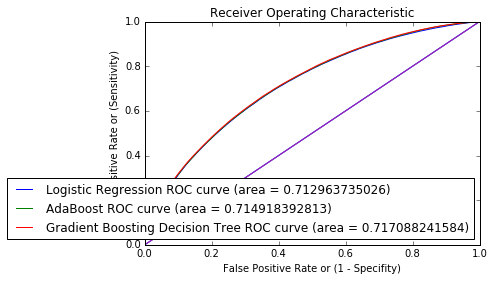

In [89]:
%%time
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score, accuracy_score

from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# "Linear SVM", "RBF SVM",
names = ["Logistic Regression",  
         "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting Decision Tree", "XGBoost"]
classifiers = [
    LogisticRegression(C=1),
#     svm.SVC(kernel="linear", C=0.025),
#     svm.SVC(gamma=0.01, C=10),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, min_samples_leaf=9),
    XGBClassifier()]

for name, clf in zip(names,classifiers):
    clf.fit(X_train, y_train)
    print("{:31} 测试集acc/recall: {:15}/{:15} 训练集acc/recall: {:15}/{:15}".format(name, 
        accuracy_score(y_test, clf.predict(X_test)), recall_score(y_test, clf.predict(X_test), average='macro'), 
        accuracy_score(y_train, clf.predict(X_train)), recall_score(y_train, clf.predict(X_train), average='micro')))
    
for name, clf in zip(names, classifiers):
    try: 
        importances = clf.feature_importances_
        indices = np.argsort(importances)[::-1]
        print('{}特征权值分布为: '.format(name))
        for f in range(X_train.shape[1]):
            print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    except AttributeError:
        print('{} has no feture_importances_'.format(name))
    
# b: blue
# g: green
# r: red
# c: cyan
# m: magenta
# y: yellow
# k: black
# w: white
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for name, clf, color in zip(names,classifiers, colors):
    # y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    try:
        y_score = clf.decision_function(X_test)
    except AttributeError:
        print('{} has no decision_function'.format(name))
        continue

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_score, sample_weight=None)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='{} ROC curve (area = {})'.format(name, roc_auc))
    plt.plot([0, 1], [0, 1], color)  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [94]:
def feature_select(clf, X_train, X_test):
    
    # 评估特征
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    print("特征权值分布为: ")
    for f in range(X_train.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
    # 过滤掉权值小于threshold的特征
    model = SelectFromModel(clf, threshold=0.02, prefit=True)
    X_train_new = model.transform(X_train)
    X_test_new = model.transform(X_test)
    print '训练集和测试集的容量以及选择的特征数为: ', X_train_new.shape, X_test_new.shape
    # 返回压缩特征之后的训练集和测试集
    return X_train_new, X_test_new

In [95]:
X_t = user_item_test.as_matrix(features)
from sklearn import preprocessing
X_t = preprocessing.scale(X_t)

In [96]:
X_compressed, X_t_compressed = feature_select(classifiers[4], X, X_t)

特征权值分布为: 
1. feature 3 (0.331854)
2. feature 8 (0.203366)
3. feature 4 (0.148786)
4. feature 10 (0.095543)
5. feature 9 (0.088117)
6. feature 11 (0.066473)
7. feature 0 (0.024473)
8. feature 5 (0.013774)
9. feature 6 (0.011050)
10. feature 2 (0.010402)
11. feature 7 (0.004146)
12. feature 1 (0.002017)
训练集和测试集的容量以及选择的特征数为:  (3120901, 7) (489929, 7)


/usr/local/lib/python2.7/dist-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [100]:
X_train_compressed, X_test_compressed, y_train, y_test = train_test_split(X_compressed, y, test_size=0.2, random_state=0)

In [102]:
for name, clf in zip(names,classifiers):
    clf.fit(X_train_compressed, y_train)
    
    print "{:31} 测试集acc: {:15} 训练集acc: {:15}".format(name, accuracy_score(clf.predict(X_test_compressed), y_test), accuracy_score(clf.predict(X_train_compressed), y_train))
    print "{:31} 测试集recall: {:15} 训练集recall: {:15}".format(name, 
        recall_score(y_test, clf.predict(X_test_compressed)), 
        recall_score(y_train, clf.predict(X_train_compressed)))

Logistic Regression             测试集acc:  0.803230152792 训练集acc:  0.803466147586
Logistic Regression             测试集recall:  0.117712676324 训练集recall:  0.116731363227
Decision Tree                   测试集acc:  0.803233356991 训练集acc:  0.803756528565
Decision Tree                   测试集recall:  0.119563927501 训练集recall:  0.119044975674
Random Forest                   测试集acc:  0.797981675187 训练集acc:  0.798446762152
Random Forest                   测试集recall: 0.00344933979953 训练集recall: 0.00336831837845
AdaBoost                        测试集acc:  0.803470467701 训练集acc:  0.803993639655
AdaBoost                        测试集recall:  0.109342489379 训练集recall:  0.108850806691
Gradient Boosting Decision Tree 测试集acc:    0.8037348141 训练集acc:  0.804428209811
Gradient Boosting Decision Tree 测试集recall:  0.101905839353 训练集recall:  0.101489673002


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBoost                         测试集acc:  0.803707578411 训练集acc:  0.804266798039


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBoost                         测试集recall: 0.0991606079066 训练集recall: 0.0985694063909


In [ ]:
%%time
param_grid = {'learning_rate': [1, 0.5, 0.1, 0.05, 0.02, 0.01],
              'max_depth': [2, 4, 6, 8],
              'min_samples_leaf': [3, 5, 9, 11, 13, 15, 17],
              'n_estimators': [10, 100, 500, 1000, 2000],
              # 'max_features': [1.0, 0.3, 0.1] ## not         possible in our example (only 1 fx)
             }

# est = GradientBoostingClassifier({'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 9})
# this may take some minutes
gs_cv = GridSearchCV(GradientBoostingClassifier(), param_grid, n_jobs=4).fit(X_train, y_train)
print(gs_cv.best_params_)


# best hyperparameter setting

# est.fit(X_train, y_train)
print(accuracy_score(y_test, gs_cv.predict(X_test)))

In [89]:
X_t = user_item_test.as_matrix(features)
from sklearn import preprocessing
X_t = preprocessing.scale(X_t)
X_t.shape

(3291332, 12)

In [90]:
y_sub = clf.predict_proba(X_t)[:,1]
submission = pd.DataFrame()
submission['user_id'] = user_item_test['user_id']
submission['photo_id'] = user_item_test['photo_id']
submission['click_probability'] = y_sub
submission['click_probability'] = submission['click_probability'].apply(lambda x: float('%.6f' % x))
submission.to_csv('sub_lr.txt', sep='\t', index=False, header=False)

In [91]:
submission['click_probability'].describe()

count    3.291332e+06
mean     2.022132e-01
std      1.253956e-01
min      0.000000e+00
25%      1.160200e-01
50%      1.669270e-01
75%      2.521780e-01
max      9.315520e-01
Name: click_probability, dtype: float64